In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from textblob.classifiers import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import wordcloud
from wordcloud import WordCloud

tweets_data = pd.read_csv('tweets_data.csv', encoding= 'utf-8-sig')
token_data = pd.read_csv('token_data.csv', encoding= 'utf-8-sig')
tweets_dictionnary = pd.read_csv('training_dictionnary.csv', encoding= 'utf-8-sig',delimiter=';')
tweet = tweets_data[tweets_data['cashtags'] == "['ocean']"][['date', 'tweet']]

In [3]:
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 tweet['TextBlob_Subjectivity'] = tweet['tweet'].apply(getSubjectivity)
 tweet ['TextBlob_Polarity'] = tweet['tweet'].apply(getPolarity)
 def getSentiment(score):
  if score < 0:
    return 'bearish' #-1 
  elif score == 0:
    return 'neutral'  #0 
  else:
    return 'bullish'  #1 
 tweet ['Sentiment'] = tweet['TextBlob_Polarity'].apply(getSentiment )
 return tweet


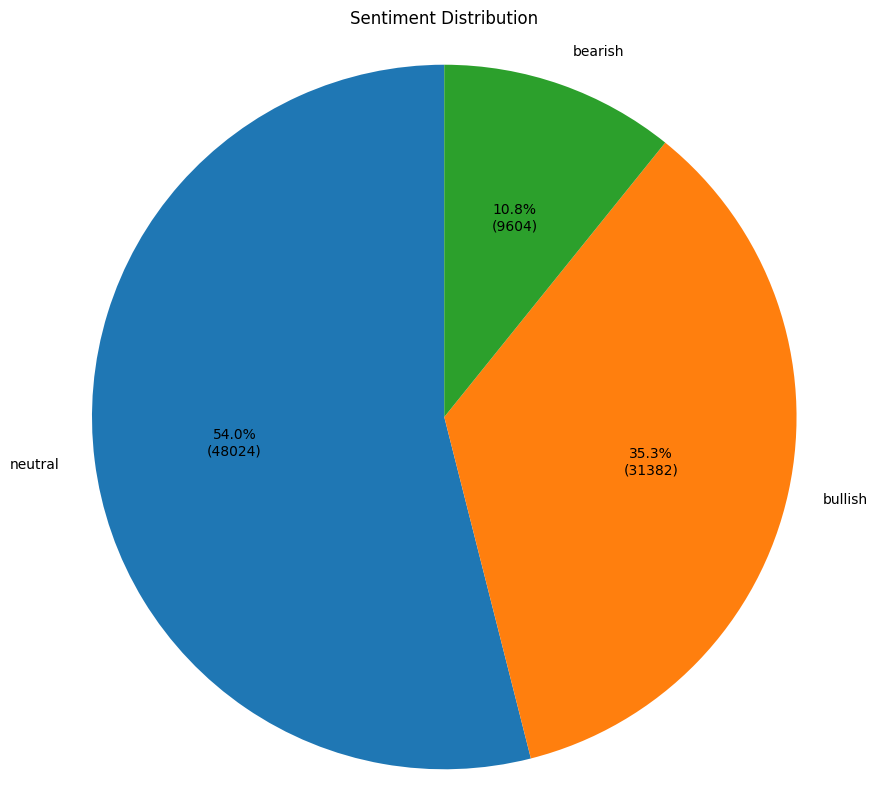

In [4]:
tweet = sentiment_analysis(tweet)

sentiment_counts = tweet['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sizes.sum())})", startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:
stop_words = ["https", "co", "http","Ocean","the","a","i","I","is","to","and","t","for","it","of","my","CryptoBOT","Cryptobot","in"]
stop_words_2 = ["https", "co", "http", "buy","good","Ocean","a","i","I","is","to","and","for","it","of","t","my","CryptoBOT","Cryptobot","in"]

# Get the positive, neutral, and negative tweets
positive_tweets = tweet[tweet['Sentiment'] == 'bullish']['tweet']
neutral_tweets = tweet[tweet['Sentiment'] == 'neutral']['tweet']
negative_tweets = tweet[tweet['Sentiment'] == 'bearish']['tweet']

# Combine the tweets into single strings
positive_text = ' '.join(positive_tweets)
neutral_text = ' '.join(neutral_tweets)
negative_text = ' '.join(negative_tweets)

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)



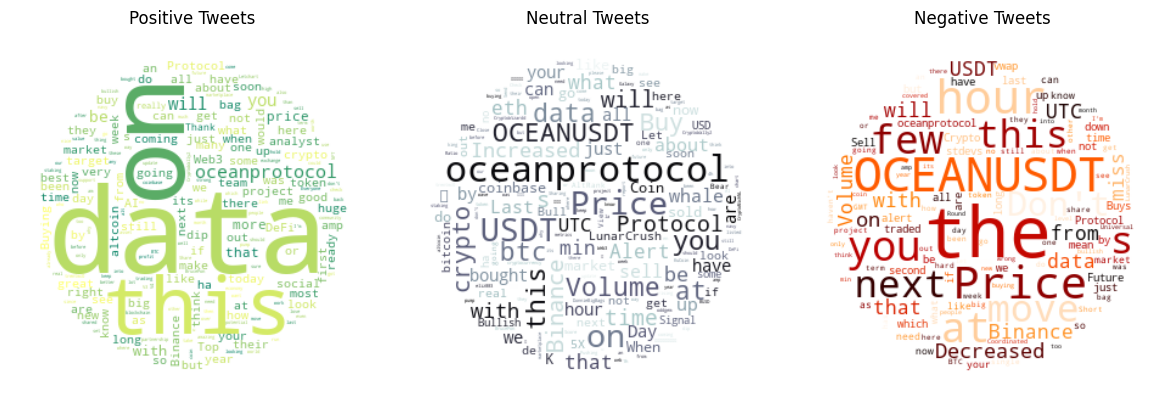

In [6]:
# Generate word clouds for positive, neutral, and negative tweets
wordcloud_positive = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "summer",stopwords=stop_words).generate(positive_text)
wordcloud_neutral = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "bone",stopwords=stop_words).generate(neutral_text)
wordcloud_negative = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "gist_heat",stopwords=stop_words_2).generate(negative_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Tweets')
axes[0].axis('off')

axes[1].imshow(wordcloud_neutral, interpolation='bilinear')
axes[1].set_title('Neutral Tweets')
axes[1].axis('off')

axes[2].imshow(wordcloud_negative, interpolation='bilinear')
axes[2].set_title('Negative Tweets')
axes[2].axis('off')

plt.tight_layout()
plt.show()

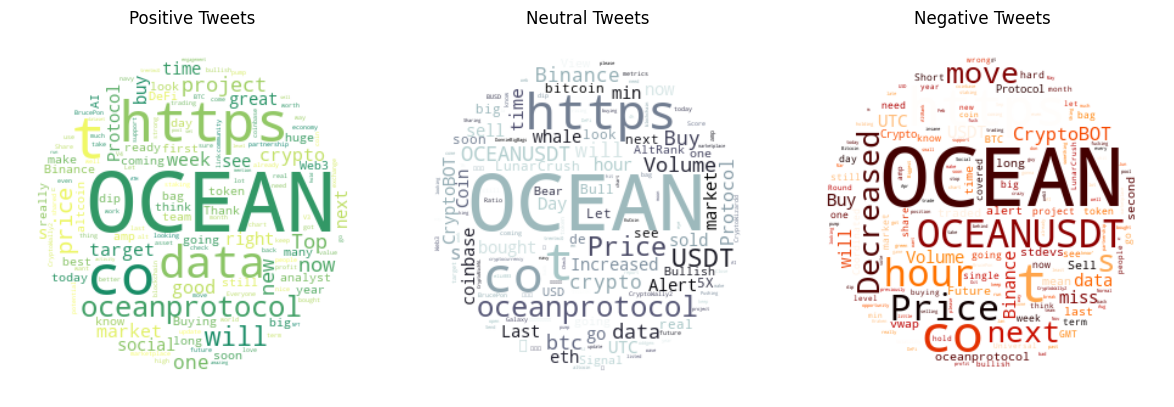

In [7]:
# Generate word clouds for positive, neutral, and negative tweets
wordcloud_positive = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "summer").generate(positive_text)
wordcloud_neutral = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "bone").generate(neutral_text)
wordcloud_negative = WordCloud(background_color='white', mask = mask ,collocations=False,colormap = "gist_heat").generate(negative_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Tweets')
axes[0].axis('off')

axes[1].imshow(wordcloud_neutral, interpolation='bilinear')
axes[1].set_title('Neutral Tweets')
axes[1].axis('off')

axes[2].imshow(wordcloud_negative, interpolation='bilinear')
axes[2].set_title('Negative Tweets')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [8]:
def sentiment_analysis3(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 tweet['TextBlob_Subjectivity'] = tweet['tweet'].apply(getSubjectivity)
 tweet ['TextBlob_Polarity'] = tweet['tweet'].apply(getPolarity)
 def getSentiment(score):
  if score < 0:
    return -1 
  elif score == 0:
    return 0 
  else:
    return 1 
 tweet ['Sentiment'] = tweet['TextBlob_Polarity'].apply(getSentiment )
 return tweet

In [9]:
tweet = sentiment_analysis3(tweet)

sentiment_by_date = tweet.groupby('date')['Sentiment'].sum().reset_index()


In [10]:
price_token_data = token_data[['Date', 'Open']]
fused_data_sentiment = pd.merge(sentiment_by_date,price_token_data,left_on='date',right_on='Date')
correlation_sent = fused_data_sentiment['Sentiment'].corr(fused_data_sentiment['Open'], method='pearson')
print(correlation_sent) 

0.3511709743740338


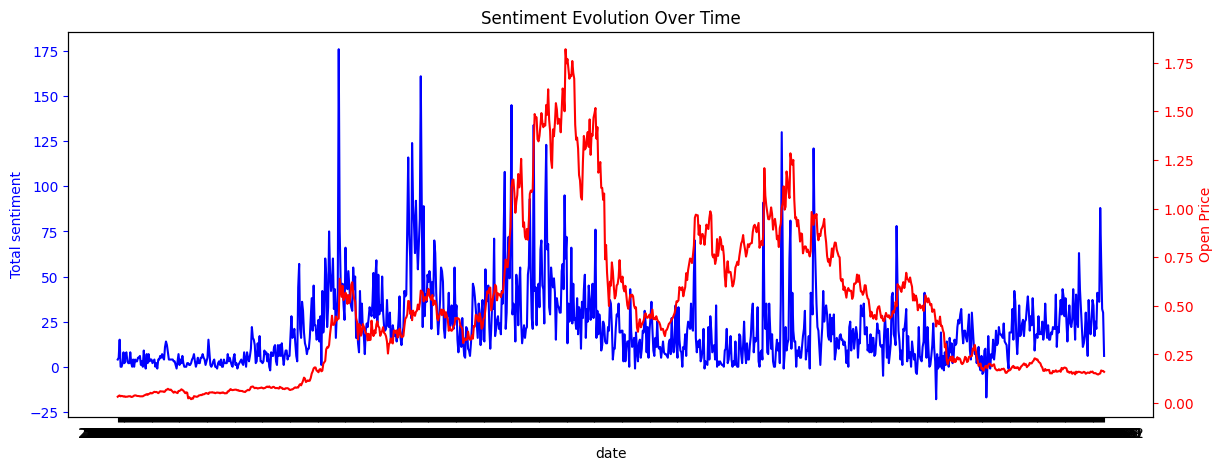

In [11]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(fused_data_sentiment['date'], fused_data_sentiment['Sentiment'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('Total sentiment', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

ax2.plot(fused_data_sentiment['date'], fused_data_sentiment['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Sentiment Evolution Over Time')
plt.show()


In [12]:

sentiment_by_date = tweet.groupby('date')['Sentiment'].mean().reset_index()
mean_fused_data_sentiment = pd.merge(sentiment_by_date,price_token_data,left_on='date',right_on='Date')


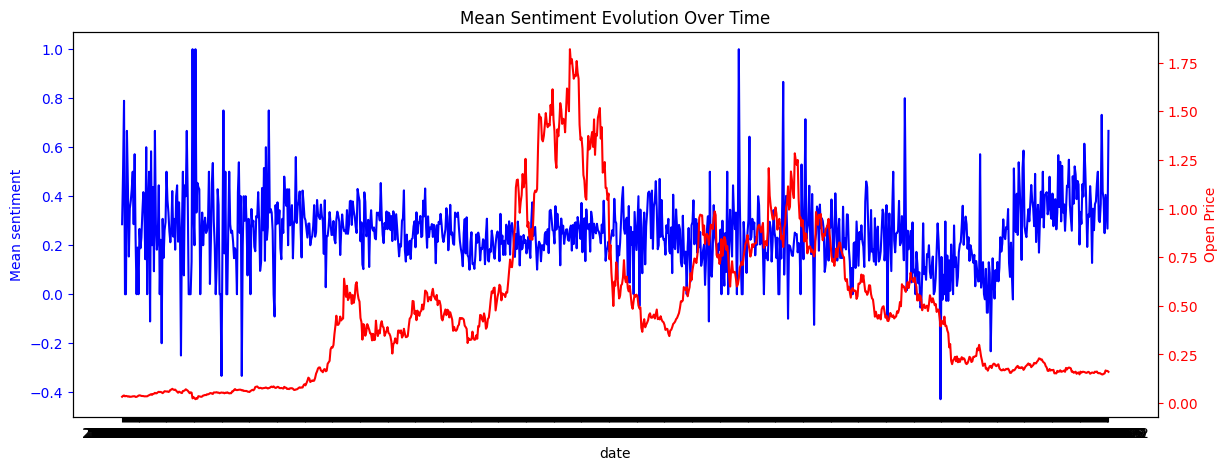

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(mean_fused_data_sentiment['date'], mean_fused_data_sentiment['Sentiment'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('Mean sentiment', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

ax2.plot(mean_fused_data_sentiment['date'], mean_fused_data_sentiment['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Mean Sentiment Evolution Over Time')
plt.show()

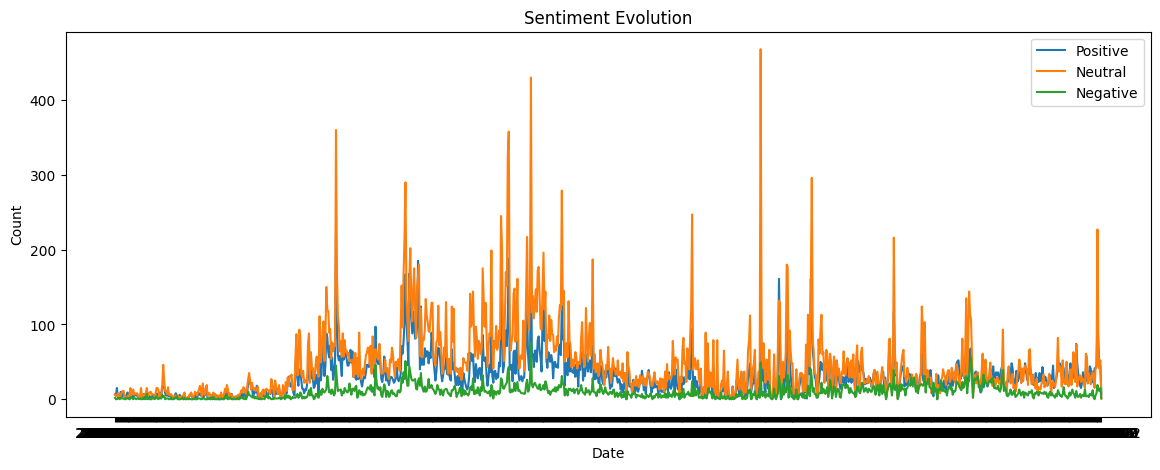

In [14]:
sentiment_counts = tweet.groupby(['date', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 5))

plt.plot(sentiment_counts.index, sentiment_counts[1], label='Positive')
plt.plot(sentiment_counts.index, sentiment_counts[0], label='Neutral')
plt.plot(sentiment_counts.index, sentiment_counts[-1], label='Negative')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Evolution')
plt.legend()

plt.show()

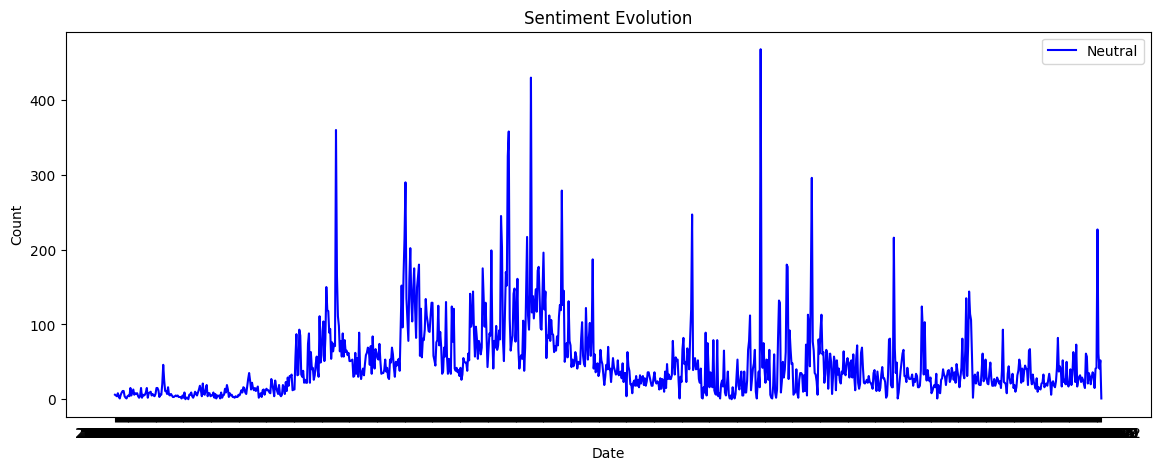

In [15]:
plt.figure(figsize=(14, 5))

# plt.plot(sentiment_counts.index, sentiment_counts[1], label='Positive', color='green')

plt.plot(sentiment_counts.index, sentiment_counts[0], label='Neutral', color='blue')

# plt.plot(sentiment_counts.index, sentiment_counts[-1], label='Negative', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Evolution')
plt.legend()

plt.show()

In [16]:
# Define keywords related to regulatory news
keywords = ['regulation', 'law', 'legal', 'government', 'SEC', 'lawsuit', 'ban', 'prohibit','update', 'upgrade', 'release', 'launch', 'development', 'improvement', 'innovation']

# Function to identify if a tweet contains any of the keywords
def contains_keywords(tweet):
    return any(keyword in tweet.lower() for keyword in keywords)

# Create a new column in the DataFrame that indicates if a tweet is regulatory
tweet['IsRegulatory'] = tweet['tweet'].apply(contains_keywords)

sentiment_by_date_regulatory = tweet[tweet['IsRegulatory'] == True]

sentiment_by_date_regulatory.to_csv('test.csv')
# Now you can group by date and IsRegulatory to get the sentiment scores for regulatory and non-regulatory tweets separately

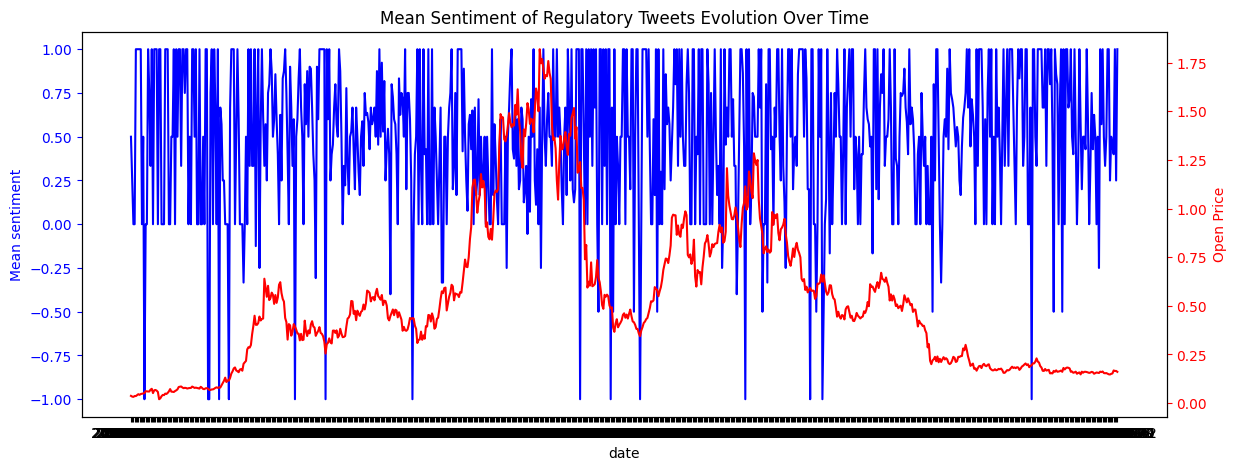

0.12826441019626175

In [17]:
regulatory_sentiment_by_date = sentiment_by_date_regulatory.groupby('date')['Sentiment'].mean().reset_index()
regulatory_fused_data_sentiment = pd.merge(regulatory_sentiment_by_date, price_token_data, left_on='date', right_on='Date')
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(regulatory_fused_data_sentiment['date'], regulatory_fused_data_sentiment['Sentiment'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('Mean sentiment', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

ax2.plot(regulatory_fused_data_sentiment['date'], regulatory_fused_data_sentiment['Open'], color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Mean Sentiment of Regulatory Tweets Evolution Over Time')
plt.show()

# Filter the DataFrame to only include positive regulatory tweets
positive_regulatory_tweets = sentiment_by_date_regulatory[sentiment_by_date_regulatory['Sentiment'] < 0]

# Group by date and count the number of positive regulatory tweets for each date
positive_regulatory_tweets_by_date = positive_regulatory_tweets.groupby('date').size().reset_index(name='PositiveRegulatoryTweetCount')

# Merge the 'positive_regulatory_tweets_by_date' with the 'price_token_data' DataFrame
fused_data = pd.merge(positive_regulatory_tweets_by_date, price_token_data, left_on='date', right_on='Date')

# Calculate the correlation between the number of positive regulatory tweets and the open price
correlation = fused_data['PositiveRegulatoryTweetCount'].corr(fused_data['Open'])
correlation

In [18]:
eth_data = pd.read_csv('ETH-USD.csv')

# Make sure 'Date' column is in datetime format
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
price_token_data = token_data[['Date', 'Open']]
price_token_data['Date'] = pd.to_datetime(price_token_data['Date'])


# Merge the two dataframes on 'Date'
merged_data = pd.merge(price_token_data, eth_data, on='Date', suffixes=('_ocean', '_eth'))

merged_data.to_csv('test.csv')

# Calculate the correlation between the open prices of Ocean and ETH
correlation = merged_data['Open_ocean'].corr(merged_data['Open_eth'])

print("The correlation between the open prices of Ocean and ETH-USD is:", correlation)

The correlation between the open prices of Ocean and ETH-USD is: 0.7038680903068186


C:\Users\niclan\AppData\Local\Temp\ipykernel_31412\2155373179.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  eth_data['Date'] = pd.to_datetime(eth_data['Date'])
C:\Users\niclan\AppData\Local\Temp\ipykernel_31412\2155373179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_token_data['Date'] = pd.to_datetime(price_token_data['Date'])


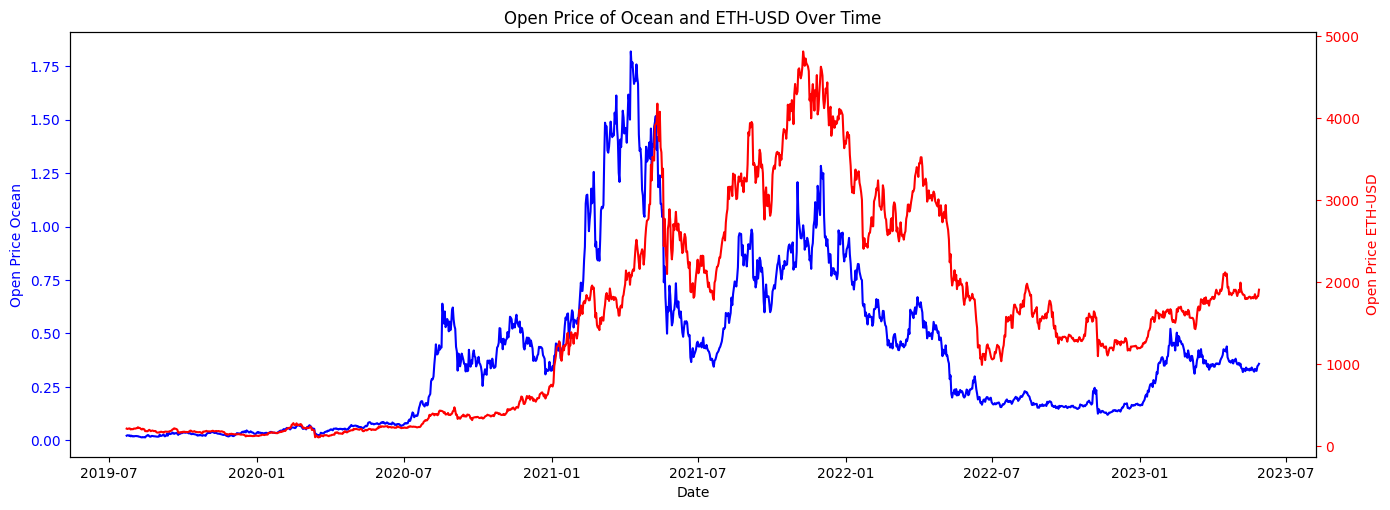

In [19]:
fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot the open price for Ocean
ax1.plot(merged_data['Date'], merged_data['Open_ocean'], color='b', label='Ocean')
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Price Ocean', color='b')
ax1.tick_params('y', colors='b')

# Create a new y-axis for the open price of ETH-USD
ax2 = ax1.twinx()

# Plot the open price for ETH-USD
ax2.plot(merged_data['Date'], merged_data['Open_eth'], color='r', label='ETH-USD')
ax2.set_ylabel('Open Price ETH-USD', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Open Price of Ocean and ETH-USD Over Time')
plt.show()

       date_x  Sentiment       Date  Open_ocean    Open_eth        High   
0  2019-12-31          4 2019-12-31    0.032700  132.612274  133.732681  \
1  2020-01-01          5 2020-01-01    0.037197  129.630661  132.835358   
2  2020-01-02         15 2020-01-02    0.039209  130.820038  130.820038   
3  2020-01-03          0 2020-01-03    0.034774  127.411263  134.554016   
4  2020-01-04          0 2020-01-04    0.036902  134.168518  136.052719   

          Low       Close   Adj Close        Volume     date_y  number_tweets  
0  128.798157  129.610855  129.610855  8.936866e+09 2019-12-31             14  
1  129.198288  130.802002  130.802002  7.935230e+09 2020-01-01             10  
2  126.954910  127.410179  127.410179  8.032709e+09 2020-01-02             19  
3  126.490021  134.171707  134.171707  1.047685e+10 2020-01-03             10  
4  133.040558  135.069366  135.069366  7.430905e+09 2020-01-04              7  
The Mean Squared Error of the predictions is 0.04752632115279487
The 

c:\Users\niclan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\niclan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\niclan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\niclan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\niclan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\niclan

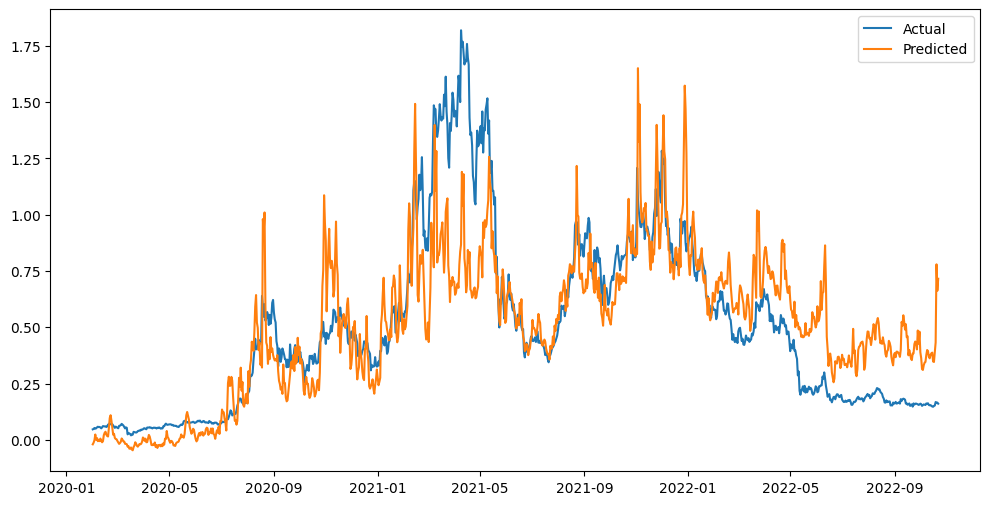

Mean Absolute Error: 0.16492666788074245


In [27]:
# Make sure 'Date' column in ETH data is in datetime format
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
fused_data_sentiment['Date'] = pd.to_datetime(fused_data_sentiment['Date'])

# Merge the fused_data_sentiment dataframe with eth_data
complete_data = pd.merge(fused_data_sentiment, eth_data, on='Date', suffixes=('_ocean', '_eth'))

# Count the number of tweets per day
number_tweets_per_day = tweet.groupby('date')['tweet'].count().reset_index()
number_tweets_per_day.rename(columns={'tweet': 'number_tweets'}, inplace=True)
number_tweets_per_day['date'] = pd.to_datetime(number_tweets_per_day['date'])

# Merge this data with your complete_data
complete_data = pd.merge(complete_data, number_tweets_per_day, left_on='Date', right_on='date')

# Let's check the first few rows of the complete dataframe
print(complete_data.head())

# Now you can generate lag features for the number of tweets and mean sentiment
for i in range(1, 4):
    complete_data[f'lag_{i}_tweets'] = complete_data['number_tweets'].shift(i)
    complete_data[f'lag_{i}_sentiment'] = complete_data['Sentiment'].shift(i)
    
complete_data = complete_data.dropna()  # drop missing values produced by shifting
complete_data.to_csv('test.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the features and the target
features = ['Open_eth'] + [f'lag_{i}_tweets' for i in range(1, 4)] + [f'lag_{i}_sentiment' for i in range(1, 4)]
target = 'Open_ocean'

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(
    complete_data[features],
    complete_data[target],
    test_size=0.2,  # 80% for training, 20% for testing
    random_state=42  # ensures that the splits generate are reproducible
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared Error of the predictions is {mse}")

# Use the model to make predictions on the entire dataset
y_pred_all = model.predict(complete_data[features])

# Calculate the mean squared error of the predictions
mse_all = mean_squared_error(complete_data[target], y_pred_all)

print(f"The Mean Squared Error of the predictions on the entire dataset is {mse_all}")


import datetime
from sklearn.metrics import mean_absolute_error

# Specify the start and end dates for the prediction period
start_date = pd.to_datetime('2020-02-01')
end_date = pd.to_datetime('2022-10-22')

# Create a list to hold the predictions
predictions_list = []

# Get the initial data for the model's inputs
data = complete_data.loc[complete_data['Date'] < start_date].copy()

date = start_date
while date <= end_date:
    # Prepare the input data for the model
    recent_data = data.loc[data['Date'] >= (date - datetime.timedelta(days=3))]
    
    # If recent_data is empty, skip this iteration
    if recent_data.empty:
        date += datetime.timedelta(days=1)
        continue

    input_data = recent_data.iloc[-1]
    input_data = input_data[['Open_eth'] + [f'lag_{i}_tweets' for i in range(1, 4)] + [f'lag_{i}_sentiment' for i in range(1, 4)]]

    
    # Use the model to make a prediction
    prediction = model.predict([input_data])[0]

    # Append the prediction to the predictions list
    predictions_list.append({'Date': date, 'Predicted_Price': prediction})

    # Shift the data by one day and update the 'Open_ocean' price with the prediction
    new_data = complete_data.loc[complete_data['Date'] == date]
    data = pd.concat([data.iloc[1:], new_data], ignore_index=True)
    data.loc[data['Date'] == date, 'Open_ocean'] = prediction

    # Update the lag features
    for i in range(1, 4):
        data[f'lag_{i}_tweets'] = data['number_tweets'].shift(i)
        data[f'lag_{i}_sentiment'] = data['Sentiment'].shift(i)

    # Move to the next day
    date += datetime.timedelta(days=1)

# Convert the predictions list into a DataFrame
predictions = pd.DataFrame(predictions_list)

# Plot the actual and predicted prices over the prediction period
plt.figure(figsize=(12, 6))  # Adjust the figure size
actual_prices = complete_data.loc[(complete_data['Date'] >= start_date) & (complete_data['Date'] <= end_date), ['Date', 'Open_ocean']]
plt.plot(actual_prices['Date'], actual_prices['Open_ocean'], label='Actual')
plt.plot(predictions['Date'], predictions['Predicted_Price'], label='Predicted')
plt.legend()
plt.show()


# Drop rows with NaN values from 'actual_prices' and 'predictions'
actual_prices.dropna(subset=['Open_ocean'], inplace=True)
predictions.dropna(subset=['Predicted_Price'], inplace=True)

# Ensure that 'Date' columns are of datetime type
actual_prices['Date'] = pd.to_datetime(actual_prices['Date'])
predictions['Date'] = pd.to_datetime(predictions['Date'])

# Keep only common dates
common_dates = set(actual_prices['Date']).intersection(set(predictions['Date']))
actual_prices = actual_prices[actual_prices['Date'].isin(common_dates)]
predictions = predictions[predictions['Date'].isin(common_dates)]

# Now, let's calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actual_prices['Open_ocean'], predictions['Predicted_Price'])
print(f"Mean Absolute Error: {mae}")



In [ ]:

def predict_price():
    # Prompt the user for input
    open_eth = float(input("Please enter the ETH price: "))
    num_tweets = float(input("Please enter the number of tweets: "))
    mean_sentiment = float(input("Please enter the mean sentiment: "))

    # Create a DataFrame from the inputs
    inputs = pd.DataFrame({
        'Open_eth': [open_eth],
        'lag_1_tweets': [num_tweets],
        'lag_1_sentiment': [mean_sentiment],
        'lag_2_tweets': [num_tweets],   # Ideally, these should be actual lags
        'lag_2_sentiment': [mean_sentiment],
        'lag_3_tweets': [num_tweets],
        'lag_3_sentiment': [mean_sentiment],
    })
    
    # Reorder the columns of the inputs DataFrame to match the features
    features = ['Open_eth'] + [f'lag_{i}_tweets' for i in range(1, 4)] + [f'lag_{i}_sentiment' for i in range(1, 4)]
    inputs = inputs[features]

    # Use the model to make a prediction
    prediction = model.predict(inputs)

    # Print the predicted price
    print(f"The predicted price for Ocean is: {prediction[0]}")


# Call the function
predict_price()

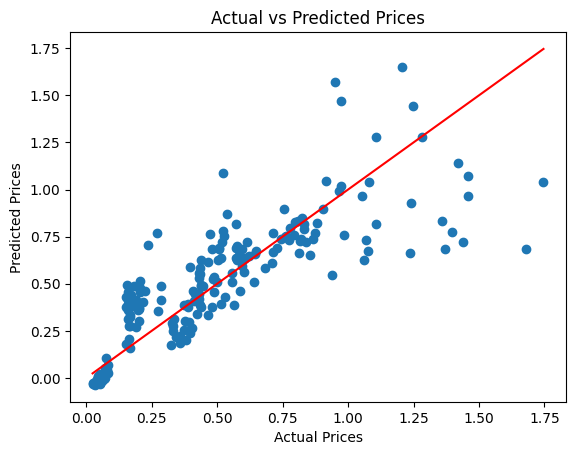

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


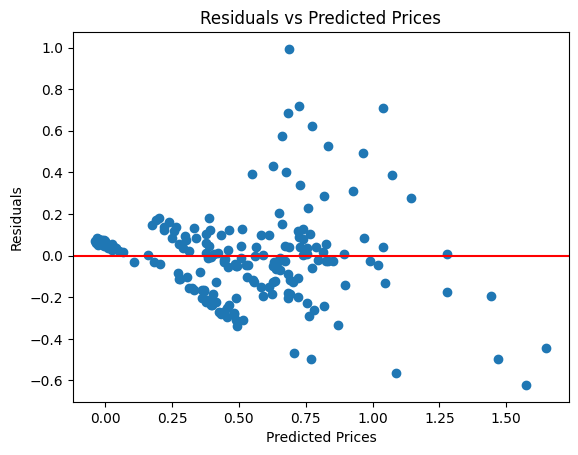

In [32]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.axhline(y=0, color='r', linestyle='-')  # Line at zero
plt.show()


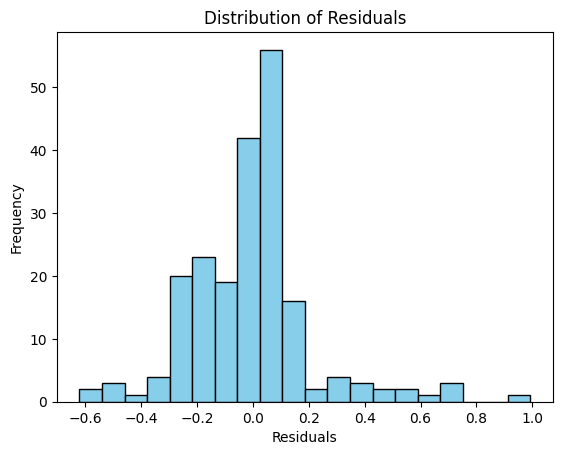

In [33]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


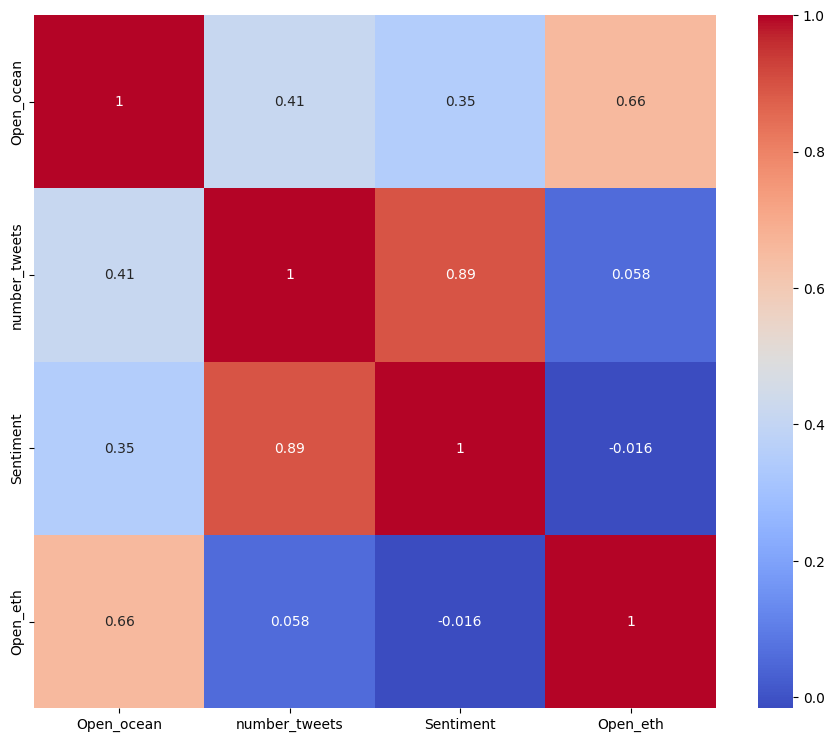

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables to be included in the heatmap
heatmap_data = complete_data[['Open_ocean',  'number_tweets', 'Sentiment', 'Open_eth']]

# Compute the correlation matrix
corr_matrix = heatmap_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

plt.show()

